In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#### Loading apple stock data

Feature Description

Open - Opening price of stock
High - Highest price stock reached on given day
Low - Lowest price stock reached on given day
Close - Closing price of stock
Volume - Amount of a security that was traded during a given day

In [2]:
df = pd.read_csv("C:/Users/lenovo/Documents/Stock Market Prediction/aapl.us.txt", index_col = 'Date', parse_dates = ['Date'])
df.describe()

,Open,High,Low,Close,Volume,OpenInt
count,8364.000000,8364.000000,8364.000000,8364.000000,8.364000e+03,8364.0
mean,22.284350,22.495867,22.054244,22.281018,1.066416e+08,0.0
std,37.763402,38.057733,37.447432,37.764469,9.935187e+07,0.0
min,0.233050,0.235640,0.230510,0.230510,0.000000e+00,0.0
25%,1.137100,1.164200,1.112800,1.137100,4.384365e+07,0.0
50%,1.632800,1.663400,1.600600,1.628250,7.481383e+07,0.0
75%,23.739000,23.930500,23.335750,23.694500,1.320534e+08,0.0
max,175.110000,175.610000,174.270000,175.610000,2.069770e+09,0.0


In [3]:
df.head()

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0
1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0
1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0
1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0
1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0


In [4]:
del df['OpenInt']

### Check for missing values

In [5]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

### Adding new feature diffOC to calculate difference b/w open and close price

In [6]:
df['diffOC'] = df['Open'] - df['Close'];

### Adding new feature diffMM to calculate diff. b/w high and low

In [7]:
df['diffMM'] = df['High'] - df['Low']

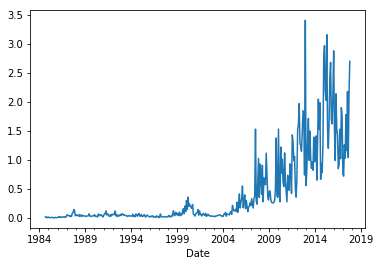

In [8]:
df['diffMM'].asfreq('m', method='ffill').plot()

### Stock opening price vs Time

Text(0, 0.5, 'Stock Open Price')

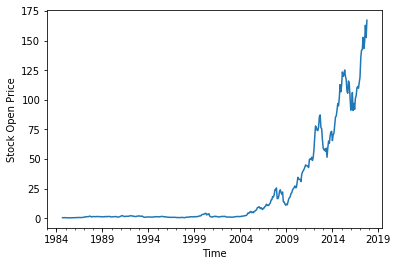

In [9]:
df['Open'].asfreq('m', method='ffill').plot()
plt.xlabel('Time')
plt.ylabel('Stock Open Price')

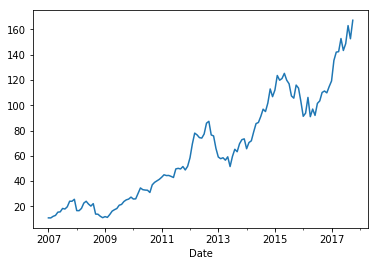

In [10]:
df['2007':]['Open'].asfreq('M', method='ffill').plot()

### Volume Vs Time

Text(0, 0.5, 'Volume')

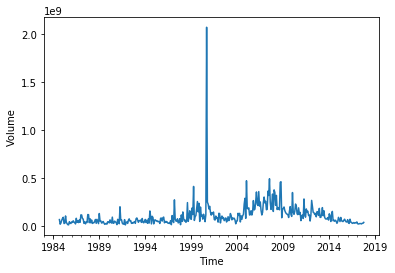

In [11]:
df['Volume'].asfreq('M', method='ffill').plot()
plt.xlabel('Time')
plt.ylabel('Volume')

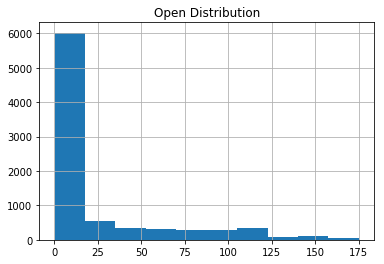

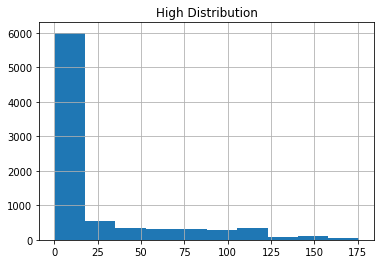

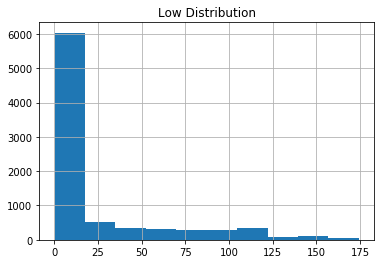

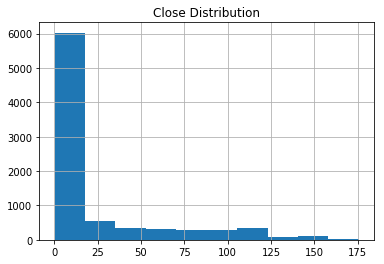

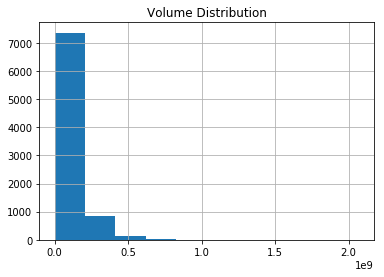

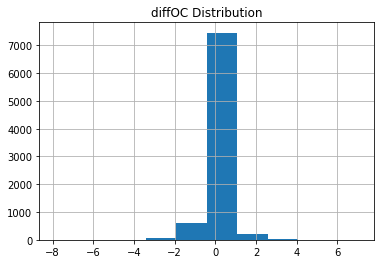

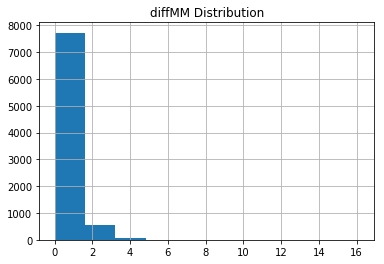

In [12]:
for i in df.columns:
    plt.title(i + " Distribution")
    df[i].hist()
    plt.show()

### Comparing all features plot side by side

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1299D610>,
      dtype=object)

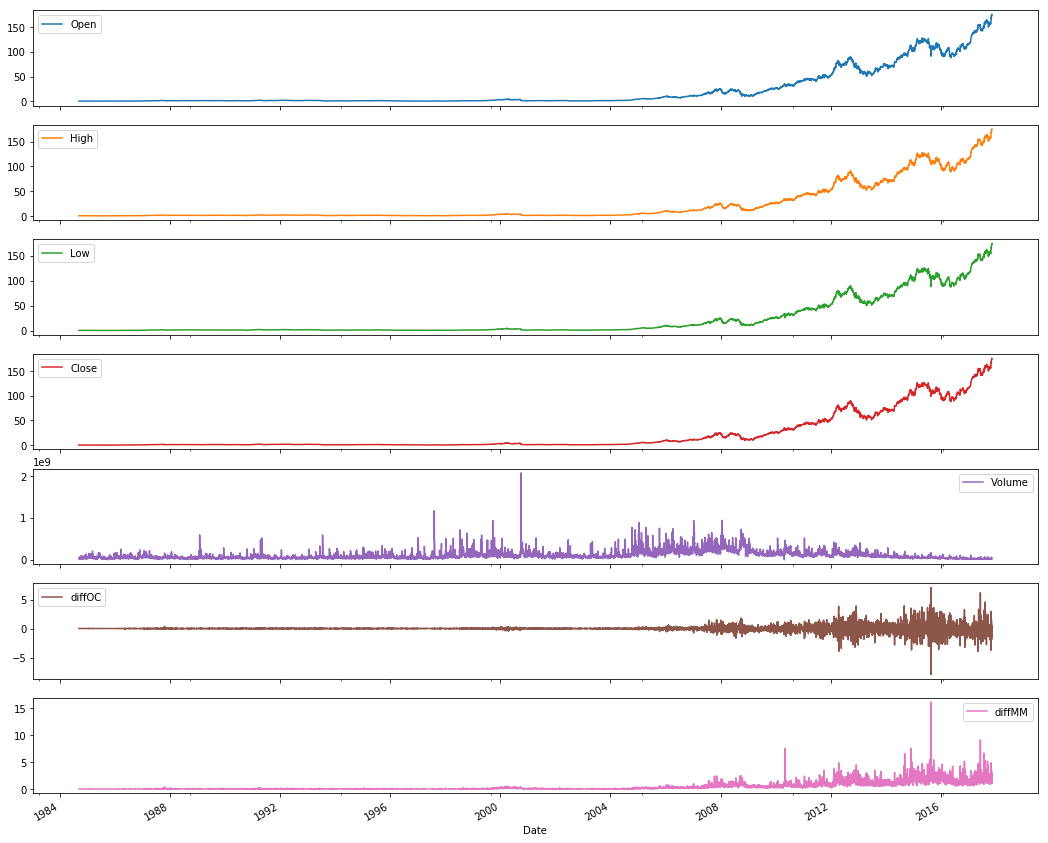

In [13]:
df.plot(subplots=True,figsize=(18,16))

### For forecasting we are going to use only data after 2007 as trend before it is not going to help

### We are going to use rolling window method for forecasting performing a rolling regression (a regression with a rolling time window) simply means, that you conduct regressions over and over again, with subsamples of your original full sample.

In [14]:
df_new = df['2007':].asfreq('M', method='ffill')
df_new.head()

,Open,High,Low,Close,Volume,diffOC,diffMM
Date,,,,,,,
2007-01-31,10.860,11.014,10.802,10.978,238301361,-0.118,0.212
2007-02-28,10.828,10.961,10.629,10.834,256409965,-0.006,0.332
2007-03-31,12.078,12.125,11.878,11.899,167475178,0.179,0.247
2007-04-30,12.813,12.933,12.763,12.780,171930349,0.033,0.170
2007-05-31,15.377,15.642,15.308,15.519,361617762,-0.142,0.334


In [15]:
df_new.describe()

,Open,High,Low,Close,Volume,diffOC,diffMM
count,130.000000,130.000000,130.000000,130.000000,1.300000e+02,130.000000,130.000000
mean,64.640146,65.131238,64.026300,64.480585,1.281713e+08,0.159562,1.104938
std,41.692337,41.866156,41.406214,41.594405,9.690739e+07,0.762525,0.706614
min,10.828000,10.961000,10.629000,10.834000,1.901259e+07,-2.851000,0.170000
25%,25.237250,25.321750,24.086750,24.394000,5.297587e+07,-0.187750,0.519000
50%,58.748500,59.027000,58.401500,58.644500,1.126063e+08,0.089000,0.988500
75%,96.976000,97.583000,96.308750,97.091500,1.689428e+08,0.429500,1.527000
max,167.300000,169.040000,166.340000,168.430000,4.906743e+08,2.320000,3.408000


Text(0, 0.5, 'Stock Closing Price')

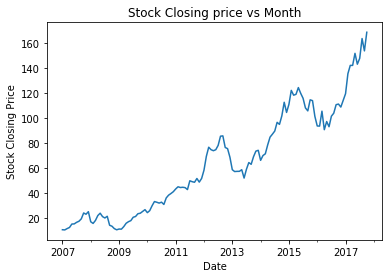

In [16]:
df_new['Close'].plot()
plt.title("Stock Closing price vs Month")
plt.ylabel("Stock Closing Price")

### Using lag of three

In [17]:
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'diffOC', 'diffMM']

In [18]:
lag = 3

In [19]:
for i in range(1,lag+1):
    fl = [s + 'l' + str(i) for s in features]
    df_new[fl] = df_new[features].shift(i)

In [20]:
df_new.head()

,Open,High,Low,Close,Volume,diffOC,diffMM,Openl1,Highl1,Lowl1,...,Volumel2,diffOCl2,diffMMl2,Openl3,Highl3,Lowl3,Closel3,Volumel3,diffOCl3,diffMMl3
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-31,10.860,11.014,10.802,10.978,238301361,-0.118,0.212,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-28,10.828,10.961,10.629,10.834,256409965,-0.006,0.332,10.860,11.014,10.802,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-03-31,12.078,12.125,11.878,11.899,167475178,0.179,0.247,10.828,10.961,10.629,...,238301361.0,-0.118,0.212,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-30,12.813,12.933,12.763,12.780,171930349,0.033,0.170,12.078,12.125,11.878,...,256409965.0,-0.006,0.332,10.860,11.014,10.802,10.978,238301361.0,-0.118,0.212
2007-05-31,15.377,15.642,15.308,15.519,361617762,-0.142,0.334,12.813,12.933,12.763,...,167475178.0,0.179,0.247,10.828,10.961,10.629,10.834,256409965.0,-0.006,0.332


In [21]:
df_new.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'diffOC', 'diffMM', 'Openl1',
       'Highl1', 'Lowl1', 'Closel1', 'Volumel1', 'diffOCl1', 'diffMMl1',
       'Openl2', 'Highl2', 'Lowl2', 'Closel2', 'Volumel2', 'diffOCl2',
       'diffMMl2', 'Openl3', 'Highl3', 'Lowl3', 'Closel3', 'Volumel3',
       'diffOCl3', 'diffMMl3'],
      dtype='object')

In [22]:
df_new = df_new.dropna()

In [23]:
df_new.shape

(127, 28)

In [24]:
final_features = ['Highl1', 'Lowl1', 'Closel1', 'Volumel1', 'diffOCl1', 'diffMMl1',
       'Openl2', 'Highl2', 'Lowl2', 'Closel2', 'Volumel2', 'diffOCl2',
       'diffMMl2', 'Openl3', 'Highl3', 'Lowl3', 'Closel3', 'Volumel3',
       'diffOCl3', 'diffMMl3']

In [25]:
target = ['Close']

In [26]:
trainX = df_new[:'2010'][final_features]
trainY = df_new[:'2010'][target]
testX = df_new[final_features]
testY = df_new[target]

In [27]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
regr = linear_model.LinearRegression()

In [29]:
regr.fit(trainX, trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
prediction = regr.predict(testX)

In [31]:
pr = pd.DataFrame(prediction)

In [32]:
pr.index = testY.index

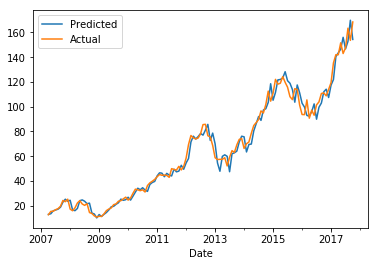

In [33]:
pr.plot()
df_new['Close'].plot()
plt.legend(['Predicted', 'Actual'])

In [34]:
mean_squared_error(prediction, testY)

32.70275884829491

In [35]:
r2_score(prediction, testY)

0.9805887600417373